## Workgroup 4
#### Group: 1
#### Members:
- Juan José Tang
- Ursula Cotrina
- Victoria Olivera

## 1. Orthogonal Learning

In [1]:
import hdmpy
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

### B = 50

In [59]:
# Set seed
np.random.seed(0)
B = 50
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [3]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

Text(0.5, 0, 'Naive - True')

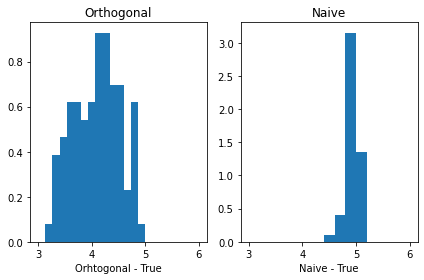

In [90]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 1 , range = (3, 5), density = True, bins=15)
axs[1].hist( Naive - 1, range = (3, 6), density = True, bins=15)

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

### B = 100

In [81]:
# Set seed
np.random.seed(0)
B = 100
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [82]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

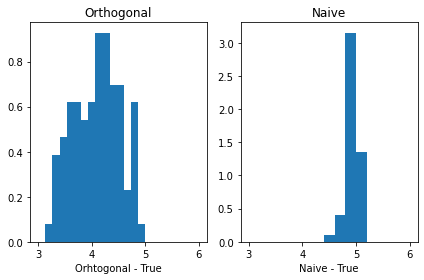

In [89]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 1 , range = (3, 5), density = True , bins = 15 )
axs[1].hist( Naive - 1, range = (3, 6), density = True , bins = 15 )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )
plt.show()

### B = 1000

In [84]:
# Set seed
np.random.seed(0)
B = 100
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [85]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

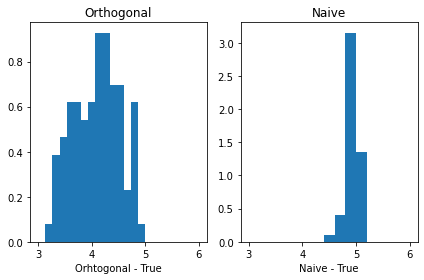

In [88]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 1 , range = (3, 5), density = True , bins = 15 )
axs[1].hist( Naive - 1, range = (3, 6), density = True , bins = 15 )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )
plt.show()

### Comments

* Explain what you observe in the distribution of the histograms. Where the orthogonal and Naive should be centered?

In the histograms, it is observed that as the number of simulations increases the distribution of the histograms approaches a normal distribution. Both orthogonal and Naive should be centered on the real value of the estimation. However, the naive estimate is biased, thus the naive distribution couldn't be centered on the real value.
* Why does this happen? Give an econometric explanation of this

This happens because as the sample size grows, the distribution centers around the mean. Likewise, by the central limit theorem if a random sample is large enough, the distribution of the mean follows a normal distribution.



## 2. Double Lasso - Testing the Convergence Hypothesis


### 2.1. Double Lasso approach

The Double Lasso approach is an estimation procedure to measure the effect of a variable of interest with respect to a dependent variable, in a context where we have a large number of covariates (probably higher than the sample size). It consists in running two lasso regressions in a partialling-out procedure, while selecting the most appropriate covariates in each step; specifically, the covariates that best predict the dependent variable and/or the independent variable. Lets consider the following model:

$$Y = \beta_1 D + \beta_2^{'}W + \epsilon $$

The Double Lasso procedure starts in running a Lasso Regression of D on W. That is:

$$D = \gamma_{DW}^{'}W + \epsilon_1 $$

And the estimator is given by:

$$\widehat{\gamma_{DW}} = argmin \sum(D - \gamma W_i)^2 + \lambda_1 \sum \hat{\psi}|\gamma_j| $$

Then, we run a Lasso Regression of Y on W.

$$Y = \gamma_{YW}^{'}W + \epsilon_2 $$

And the estimator is given by:

$$\widehat{\gamma_{YW}} = argmin \sum(Y - \gamma W_i)^2 + \lambda_2 \sum \hat{\psi}|\gamma_j| $$

Where $\lambda_1$,$\lambda_2$ are hyperparameters chosen by some estimation techniques (such as Cross Validation).

Finally, to estimate the effect of D on Y we only need to make an OLS regression between $\tilde{Y}$ $\tilde{D}$ without intercept:

$$\tilde{Y} =  \beta_1\tilde{D} + \xi $$

### 2.2. Replicate the results

In [6]:
import hdmpy
import pandas as pd
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import random

In [7]:
# I downloaded the data that the author used
growth_read = pyreadr.read_r("../../data/GrowthData.RData")

# Extracting the data frame from rdata_read
growth = growth_read[ 'GrowthData' ]
list(growth)

['Outcome',
 'intercept',
 'gdpsh465',
 'bmp1l',
 'freeop',
 'freetar',
 'h65',
 'hm65',
 'hf65',
 'p65',
 'pm65',
 'pf65',
 's65',
 'sm65',
 'sf65',
 'fert65',
 'mort65',
 'lifee065',
 'gpop1',
 'fert1',
 'mort1',
 'invsh41',
 'geetot1',
 'geerec1',
 'gde1',
 'govwb1',
 'govsh41',
 'gvxdxe41',
 'high65',
 'highm65',
 'highf65',
 'highc65',
 'highcm65',
 'highcf65',
 'human65',
 'humanm65',
 'humanf65',
 'hyr65',
 'hyrm65',
 'hyrf65',
 'no65',
 'nom65',
 'nof65',
 'pinstab1',
 'pop65',
 'worker65',
 'pop1565',
 'pop6565',
 'sec65',
 'secm65',
 'secf65',
 'secc65',
 'seccm65',
 'seccf65',
 'syr65',
 'syrm65',
 'syrf65',
 'teapri65',
 'teasec65',
 'ex1',
 'im1',
 'xr65',
 'tot1']

In [8]:
growth.shape

(90, 63)

The sample contains $90$ countries and $63$ controls. Thus $p \approx 60$, $n=90$ and $p/n$ is not small. We expect the least squares method to provide a poor estimate of $\beta_1$.  We expect the method based on partialling-out with Lasso to provide a high quality estimate of $\beta_1$.

To check this hypothesis, we analyze the relation between the output variable $Y$ and the other country's characteristics by running a linear regression in the first step.

In [9]:
# import statistical model packages (ols, lasso, etc)

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
# We create the main variables
y = growth['Outcome']
X = growth.drop('Outcome', axis = 1)

### 2.2.1. OLS regression

In [11]:
# OLS regression
reg_ols  = sm.OLS(y, X).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3.607
Date:                Fri, 06 May 2022   Prob (F-statistic):           0.000200
Time:                        11:43:57   Log-Likelihood:                 238.24
No. Observations:                  90   AIC:                            -352.5
Df Residuals:                      28   BIC:                            -197.5
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2472      0.785      0.315      0.7

In [12]:
# output: estimated regression coefficient corresponding to the target regressor
est_ols = reg_ols.summary2().tables[1]['Coef.']['gdpsh465']

# output: std. error
std_ols = reg_ols.summary2().tables[1]['Std.Err.']['gdpsh465']

# output: 95% confidence interval
lower_ci = reg_ols.summary2().tables[1]['[0.025']['gdpsh465']
upper_ci = reg_ols.summary2().tables[1]['0.975]']['gdpsh465']

### Summarize OLS results

In [13]:
table_1 = np.zeros( (1, 4) )

table_1[0,0] = est_ols  
table_1[0,1] = std_ols   
table_1[0,2] = lower_ci
table_1[0,3] = upper_ci    


table_1_pandas = pd.DataFrame( table_1, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])

In [14]:
table_1_pandas.index = [ "OLS" ]


In [15]:
table_1_pandas.index = [ "OLS" ]
table_1_html = table_1_pandas.to_html()
table_1_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Estimator</th>\n      <th>Std. Error</th>\n      <th>lower bound CI</th>\n      <th>upper bound CI</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>OLS</th>\n      <td>-0.009378</td>\n      <td>0.029888</td>\n      <td>-0.0706</td>\n      <td>0.051844</td>\n    </tr>\n  </tbody>\n</table>'

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">     <th></th>      <th>Estimator</th>      <th>Std. Error</th>      <th>lower bound CI</th>      <th>upper bound CI</th>   </tr> </thead>  <tbody>    <tr>     <th>OLS</th>      <td>-0.009378</td>      <td>0.029888</td>     <td>-0.0706</td>     <td>0.051844</td>   </tr> </tbody> </table>

Least squares provides a rather noisy estimate (high standard error) of the
speed of convergence, and does not allow us to answer the question
about the convergence hypothesis since the confidence interval includes zero.

In contrast, we can use the partialling-out approach based on lasso regression ("Double Lasso").

### 2.2.2. Double lasso: cross validation

In [16]:
# Create main variables
Y = growth['Outcome']
W = growth.drop(['Outcome','intercept', 'gdpsh465'], axis =  1 )
D = growth['gdpsh465']

In [17]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.00077 )
r_Y = Y - lasso_model.fit( W, Y ).predict( W )
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D - lasso_model.fit( W, D ).predict( W )
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']



C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.829e-03, tolerance: 2.343e-05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.997e+00, tolerance: 7.148e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [18]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via partialling-out using lasso {partial_lasso_est}" )

Coefficient for D via partialling-out using lasso -0.04774655653302144


In [19]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

### Summarize the results

In [20]:
table_2 = np.zeros( (1, 4) )

table_2[0,0] = est_lasso  
table_2[0,1] = std_lasso   
table_2[0,2] = lower_ci_lasso
table_2[0,3] = upper_ci_lasso    


table_2_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_2_pandas.index = [ "LASSO" ]
table_2_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO,-0.047747,0.017705,-0.082926,-0.012567


In [21]:
table_3 = table_1_pandas.append(table_2_pandas)
table_3

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO,-0.047747,0.017705,-0.082926,-0.012567


In [22]:
table_3_html = table_3.to_html()
print(table_3_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Estimator</th>
      <th>Std. Error</th>
      <th>lower bound CI</th>
      <th>upper bound CI</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>OLS</th>
      <td>-0.009378</td>
      <td>0.029888</td>
      <td>-0.070600</td>
      <td>0.051844</td>
    </tr>
    <tr>
      <th>LASSO</th>
      <td>-0.047747</td>
      <td>0.017705</td>
      <td>-0.082926</td>
      <td>-0.012567</td>
    </tr>
  </tbody>
</table>


The least square method provides a rather noisy estimate of the speed of convergence. We can not answer the question if poor countries grow faster than rich countries. The least square method does not work when the ratio $p/n$ is large.

In sharp contrast, partialling-out via Lasso provides a more precise estimate. The Lasso based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-7.8\%,-2.2\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Estimator</th>
      <th>Std. Error</th>
      <th>lower bound CI</th>
      <th>upper bound CI</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>OLS</th>
      <td>-0.009378</td>
      <td>0.029888</td>
      <td>-0.070600</td>
      <td>0.051844</td>
    </tr>
    <tr>
      <th>LASSO</th>
      <td>-0.047747</td>
      <td>0.017705</td>
      <td>-0.082926</td>
      <td>-0.012567</td>
    </tr>
  </tbody>
</table>

### 2.2.3. Double lasso: Theorical lambda

In [23]:
res_Y = hdmpy.rlasso( W, Y).est['residuals']   # By default Post lasso 
res_D = hdmpy.rlasso( W, D ).est['residuals'] # By default Post lasso 

r_Y = pd.DataFrame(res_Y, columns=['r_Y'])
r_D = pd.DataFrame(res_D, columns=['r_D'])

In [24]:
# OLS regression
reg_ols  = sm.OLS(r_Y, r_D).fit()
print(reg_ols.summary())

#.get_robustcov_results(cov_type = "HC1")

                                 OLS Regression Results                                
Dep. Variable:                    r_Y   R-squared (uncentered):                   0.127
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              12.92
Date:                Fri, 06 May 2022   Prob (F-statistic):                    0.000533
Time:                        11:43:58   Log-Likelihood:                          152.68
No. Observations:                  90   AIC:                                     -303.4
Df Residuals:                      89   BIC:                                     -300.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = reg_ols.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso = reg_ols.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso = reg_ols.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = reg_ols.summary2().tables[1]['0.975]']['r_D']

In [26]:
table_4 = np.zeros( (1, 4) )

table_4[0,0] = est_lasso   
table_4[0,1] = std_lasso    
table_4[0,2] = lower_ci_lasso 
table_4[0,3] = upper_ci_lasso     


table_4_pandas = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_4_pandas.index = [ "LASSO HDM" ]
table_4_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO HDM,-0.049811,0.013858,-0.077347,-0.022276


In [27]:
table_s = table_3.append(table_4_pandas)
table_s

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO,-0.047747,0.017705,-0.082926,-0.012567
LASSO HDM,-0.049811,0.013858,-0.077347,-0.022276


### 2.2.4. Double Lasso: Partialling out

In [28]:
# Datadframe 

Y = growth[['Outcome']]
D = growth[['gdpsh465']]

In [29]:
lasso_direct = hdmpy.rlassoEffect(x=W, y=Y, d=D, method="partialling out")  # put as argument method="partialling out"
lasso_direct

{'alpha': -0.04981144483733837,
 'se': array([0.01539133]),
 't': array([-3.23633167]),
 'pval': array([0.00121077]),
 'coefficients': -0.04981144483733837,
 'coefficient': -0.04981144483733837,
 'coefficients_reg':                     0
 (Intercept)  0.058101
 x0          -0.075565
 x1           0.000000
 x2           0.000000
 x3           0.000000
 ...               ...
 x55          0.000000
 x56          0.000000
 x57          0.000000
 x58          0.000000
 x59          0.000000
 
 [61 rows x 1 columns],
 'selection_index': array([[ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
     

In [30]:
# lasso_direct is a dictionary 
# alpha coefficient of D 

type(lasso_direct)

dict

In [31]:
lasso_direct.keys()   # hoe to get keys 

# selection index index column of principal regresor 

dict_keys(['alpha', 'se', 't', 'pval', 'coefficients', 'coefficient', 'coefficients_reg', 'selection_index', 'residuals', 'samplesize'])

In [32]:
lasso_direct['alpha']

-0.04981144483733837

In [33]:
est_lasso_hdm = lasso_direct['alpha']
std_lasso_hdm = lasso_direct["se"]
lower_ci_lasso_hdm = est_lasso - 1.96*std_lasso
upper_ci_lasso_hdm = est_lasso + 1.96*std_lasso

# t - critical value (DISTRIBUCIÓN NORMAL,  nivel de significancia del 5%)

In [34]:
table_4 = np.zeros( (1, 4) )

table_4[0,0] = est_lasso_hdm   
table_4[0,1] = std_lasso_hdm    
table_4[0,2] = lower_ci_lasso_hdm 
table_4[0,3] = upper_ci_lasso_hdm     


table_4_pandas = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_4_pandas.index = [ "LASSO_direct" ]
table_4_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_direct,-0.049811,0.015391,-0.076973,-0.02265


In [35]:
table_s = table_s.append(table_4_pandas)
table_s

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO,-0.047747,0.017705,-0.082926,-0.012567
LASSO HDM,-0.049811,0.013858,-0.077347,-0.022276
LASSO_direct,-0.049811,0.015391,-0.076973,-0.022650


In [36]:
summary=pd.DataFrame(table_s)
summary

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO,-0.047747,0.017705,-0.082926,-0.012567
LASSO HDM,-0.049811,0.013858,-0.077347,-0.022276
LASSO_direct,-0.049811,0.015391,-0.076973,-0.022650


In [37]:
varname=['OLS','LASSO','LASSO HDM','LASSO direct']

In [38]:
summary['varname']=varname
summary

,Estimator,Std. Error,lower bound CI,upper bound CI,varname
OLS,-0.009378,0.029888,-0.070600,0.051844,OLS
LASSO,-0.047747,0.017705,-0.082926,-0.012567,LASSO
LASSO HDM,-0.049811,0.013858,-0.077347,-0.022276,LASSO HDM
LASSO_direct,-0.049811,0.015391,-0.076973,-0.022650,LASSO direct


In [39]:
summary['err']=(summary['lower bound CI']-summary['upper bound CI'])/2
summary

,Estimator,Std. Error,lower bound CI,upper bound CI,varname,err
OLS,-0.009378,0.029888,-0.070600,0.051844,OLS,-0.061222
LASSO,-0.047747,0.017705,-0.082926,-0.012567,LASSO,-0.035180
LASSO HDM,-0.049811,0.013858,-0.077347,-0.022276,LASSO HDM,-0.027535
LASSO_direct,-0.049811,0.015391,-0.076973,-0.022650,LASSO direct,-0.027161


C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


Text(0.5, 1.0, 'Interval confidence of sex coefficient')

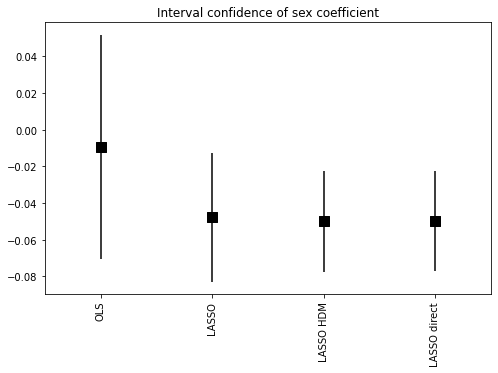

In [40]:
fig, ax = plt.subplots(figsize=(8, 5))
summary.plot(x='varname', y='Estimator', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(summary.shape[0]), 
        marker='s', s=120, 
        y=summary['Estimator'], color='black')
plt.title('Interval confidence of sex coefficient')
#ax.axhline(y=0, linestyle='--', color='black', linewidth=4)

## 3. Neyman Orthogonality proof

We have the following linear regression:

$$Y = \alpha D + \beta W' + \epsilon$$

Where: $\alpha$ is the target paramter, $\gamma_{DW}'$ is the estimator of lasso regression D on W and $\gamma_{YW}'$ is the estimator of lasso regression Y on W. On the other hand, $\tilde{Y}$ and $\tilde{D}$ are residuals from the estimation:

$$\tilde{Y} = Y-\gamma_{YW}'W$$

$$\tilde{D} = D- \gamma_{DW}'W$$

Then, we get the vector $\eta^{0}$ with true values:
$$\eta^{0} = (\gamma_{DW}',\gamma_{YW}')'$$

In this case, $\alpha$ is a function of $\eta$, so $\alpha=\alpha(\eta)$ and $\eta=(\eta_{1}',\eta_{2}')$

We want to demonstrate that, in first orden, $\alpha$ is insensitive to local perturbations around the true value $\eta^{0}$.

$$D = \dfrac {\partial \alpha(\eta^{0})}{\partial \eta}=0$$

Let's propose:
$$\tilde{Y} = a \tilde{D} + \mu$$

where $\alpha=\arg\min_{a \in \mathbb R}E(\tilde{Y}-a\tilde{D})^2$. $\alpha$ is the true value of $a$, since $a=\alpha$ solves the equation:

$$E(\tilde{Y}-a\tilde{D})\tilde{D}=0$$

Based on the following condition (equation number 1):

$$M(a,\eta)=E[(\tilde{Y}(\eta_{1})-a\tilde{D}(\eta_{2}))\tilde{D}(\eta_{2})]$$

Where: $\tilde{Y}(\eta_{1})=Y-\eta_{1}'W$ and $\tilde{D}(\eta_{2})=D-\eta_{2}'W$.

Corresponding to the true values $\eta=\eta^{0}$:

$$\tilde{Y}=Y-\gamma_{YW}'W ; \tilde{D}=D-\gamma_{DW}'W$$

By the implicit function theorem:

$$\dfrac {\partial a}{\partial \eta}=-\partial_{a}M(\alpha,\eta^{0})^{-1}\partial_{\eta}M(\alpha,\eta^{0})$$

Remember that we want to demonstrate $\dfrac {\partial \alpha(\eta^{0})}{\partial \eta}=0$

As we observe, the first component $\partial_{a}M(\alpha,\eta^{0})$ can not be zero, so to get what we want, $\partial_{\eta}M(\alpha,\eta^{0})$ must be zero.

The second componet is:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta}=\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}+\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}$$

Solving:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}=E[\dfrac {\partial \tilde{Y}(\eta_{1})}{\partial \eta_{1}}\tilde{D}] $$

As we know: $\tilde{Y} = Y-\eta_{1}'W$

$$\dfrac {\partial \tilde{Y}}{\partial \eta_{1}}=-W $$

Then:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}=E[-W\tilde{D}]=0$$

Now:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}=E[(-a\dfrac {\partial \tilde{D}(\eta_{2})}{\partial \eta_{2}})\tilde{D} + \dfrac {\partial \tilde{D}(\eta_{2})}{\partial \eta_{2}}(\tilde{Y}-a\tilde{D})] $$

As we know: $\tilde{D} = D-\eta_{2}'W$

$$\dfrac {\partial \tilde{D}}{\partial \eta_{2}}=-W $$

Then:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}=E[-a(-W)\tilde{D}+(-W)(\tilde{Y}-a\tilde{D})] $$

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}=-E(W\tilde{Y})+2E(\alpha W\tilde{D})=0 $$

Thus, we have shown that is true that $\dfrac {\partial M}{\partial \eta_{1}}=0$ and $\dfrac {\partial M}{\partial \eta_{2}}=0$. It means that $\dfrac {\partial \alpha(\eta^{0})}{\partial \eta}=0$.